Data Analysis of India vs England Test series Anderson & Tendulkar Trophy 2025.
1. df1 = First test match
2. df2 = Second test match
3. df3 = Third test match

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# REGRESSORS
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, Lars, LassoLars, OrthogonalMatchingPursuit, HuberRegressor, RANSACRegressor, TheilSenRegressor, PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR

# CLUSTERING
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering, AffinityPropagation, Birch, SpectralClustering, OPTICS

# PREPROCESSING, PIPELINE, MODEL SELECTION, METRICS (often needed too)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [36]:
df1= pd.read_csv("/content/First_Test_ATT_2025.csv")
df1.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wicket,player_out
0,India,0,YBK Jaiswal,CR Woakes,KL Rahul,0,0,0,NaN,NaN
1,India,0,YBK Jaiswal,CR Woakes,KL Rahul,0,0,0,NaN,NaN
2,India,0,YBK Jaiswal,CR Woakes,KL Rahul,0,0,0,NaN,NaN
3,India,0,YBK Jaiswal,CR Woakes,KL Rahul,0,0,0,NaN,NaN
4,India,0,YBK Jaiswal,CR Woakes,KL Rahul,0,0,0,NaN,NaN


In [37]:
df2 = pd.read_csv("/content/Second_Test_ATT_2025.csv")
df2.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wicket,player_out
0,India,0,YBK Jaiswal,CR Woakes,KL Rahul,0,0,0,NaN,NaN
1,India,0,YBK Jaiswal,CR Woakes,KL Rahul,0,0,0,NaN,NaN
2,India,0,YBK Jaiswal,CR Woakes,KL Rahul,0,0,0,NaN,NaN
3,India,0,YBK Jaiswal,CR Woakes,KL Rahul,0,0,0,NaN,NaN
4,India,0,YBK Jaiswal,CR Woakes,KL Rahul,4,0,4,NaN,NaN


In [38]:
df3 = pd.read_csv("/content/Third_Test_ATT_2025.csv")
df3.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wicket,player_out
0,England,0,Z Crawley,JJ Bumrah,BM Duckett,0,0,0,NaN,NaN
1,England,0,Z Crawley,JJ Bumrah,BM Duckett,0,0,0,NaN,NaN
2,England,0,Z Crawley,JJ Bumrah,BM Duckett,0,1,1,NaN,NaN
3,England,0,BM Duckett,JJ Bumrah,Z Crawley,0,0,0,NaN,NaN
4,England,0,BM Duckett,JJ Bumrah,Z Crawley,1,0,1,NaN,NaN


Top 5 scorer's for first match

In [39]:
# Group by batter and sum their runs
batter_runs = df1.groupby("batter")["runs_batter"].sum()

# Find the batter with the highest score
top_scorer = batter_runs.idxmax()
top_runs = batter_runs.max()

print(f"Top scorer: {top_scorer} with {top_runs} runs")


Top scorer: RR Pant with 252 runs


In [40]:
batter_runs.sort_values(ascending=False).head(5)

,runs_batter
batter,
RR Pant,252
BM Duckett,211
KL Rahul,179
Shubman Gill,155
OJ Pope,114


Top 5 wicket takers of the first match

In [41]:
# Filter only the deliveries where a wicket was taken
wickets_df = df1[df1["wicket"].notnull()]

# Count how many times each bowler appears in those deliveries
bowler_wickets = wickets_df.groupby("bowler").size()

# Get top 5 bowlers
Number_of_wickets= bowler_wickets.max()
#top_wicket_taker = bowler_wickets.sort_values(ascending=False).head(5)

#top wicket taker
top_wicket_taker = bowler_wickets.idxmax()

#print(f"Top wicket taker: {bowler_wickets} with {top_wicket_taker} runs")
print(f"Top wicket taker:{top_wicket_taker} with {Number_of_wickets} wickets")

Top wicket taker:JC Tongue with 7 wickets


In [42]:
bowler_wickets.sort_values(ascending=False).head(5)

,0
bowler,
JC Tongue,7
BA Stokes,5
M Prasidh Krishna,5
JJ Bumrah,5
BA Carse,4


Now we are combining the data of first 3 match and analysing it.
1. combined_df = df1 + df2 + df3

In [43]:
# Combine all three DataFrames into one
combined_df = pd.concat([df1, df2, df3])

# Group by batter and sum total runs
total_runs = combined_df.groupby("bowler")["runs_batter"].sum()

# Sort and get top 5
top_5_scorers = total_runs.sort_values(ascending=False).head(5)

print(top_5_scorers)

bowler
Shoaib Bashir     539
BA Carse          421
Mohammed Siraj    403
CR Woakes         388
JC Tongue         362
Name: runs_batter, dtype: int64


In [44]:
# Filter only the deliveries where a wicket was taken
wickets_df = combined_df[combined_df["wicket"].notnull()]

 # Group by bowler and sum total wicket taken
total_wicket = wickets_df.groupby("bowler").size()

# Sort and get top 5
top_5_wicket_takers = total_wicket.sort_values(ascending=False).head(5)

print(top_5_wicket_takers)

bowler
Mohammed Siraj    13
JJ Bumrah         12
Akash Deep        11
BA Stokes         11
Shoaib Bashir     11
dtype: int64


/tmp/ipython-input-1851874018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batters.values, y=top_batters.index, palette="viridis")


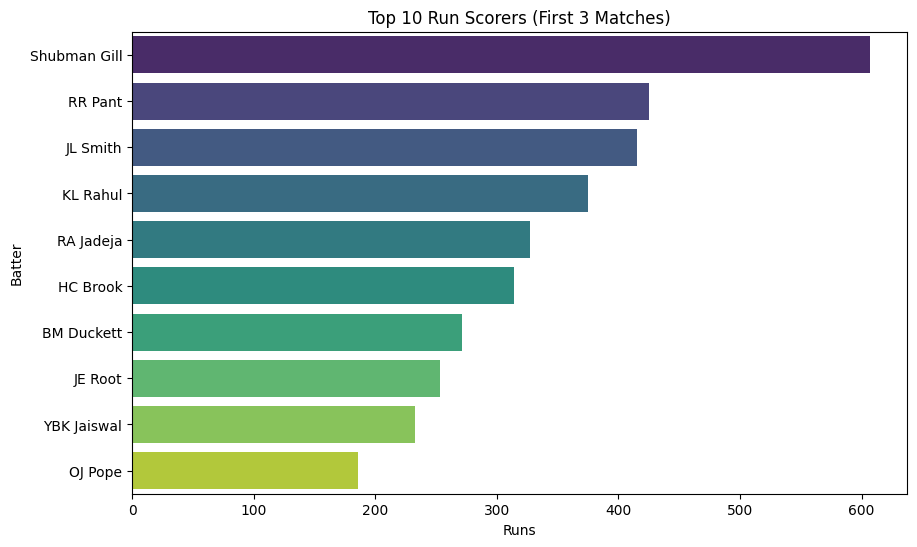

In [45]:
# Combine only first three matches
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# TOP BATTERS
top_batters = combined_df.groupby('batter')['runs_batter'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_batters.values, y=top_batters.index, palette="viridis")
plt.title("Top 10 Run Scorers (First 3 Matches)")
plt.xlabel("Runs")
plt.ylabel("Batter")
plt.show()



/tmp/ipython-input-1455853234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_totals.index, y=team_totals.values, palette="tab10")


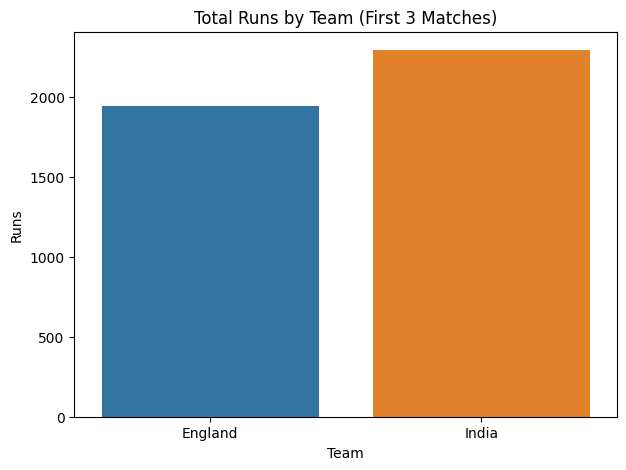

In [46]:
# TEAM TOTALS
team_totals = combined_df.groupby('team')['runs_batter'].sum()
plt.figure(figsize=(7,5))
sns.barplot(x=team_totals.index, y=team_totals.values, palette="tab10")
plt.title("Total Runs by Team (First 3 Matches)")
plt.ylabel("Runs")
plt.xlabel("Team")
plt.show()

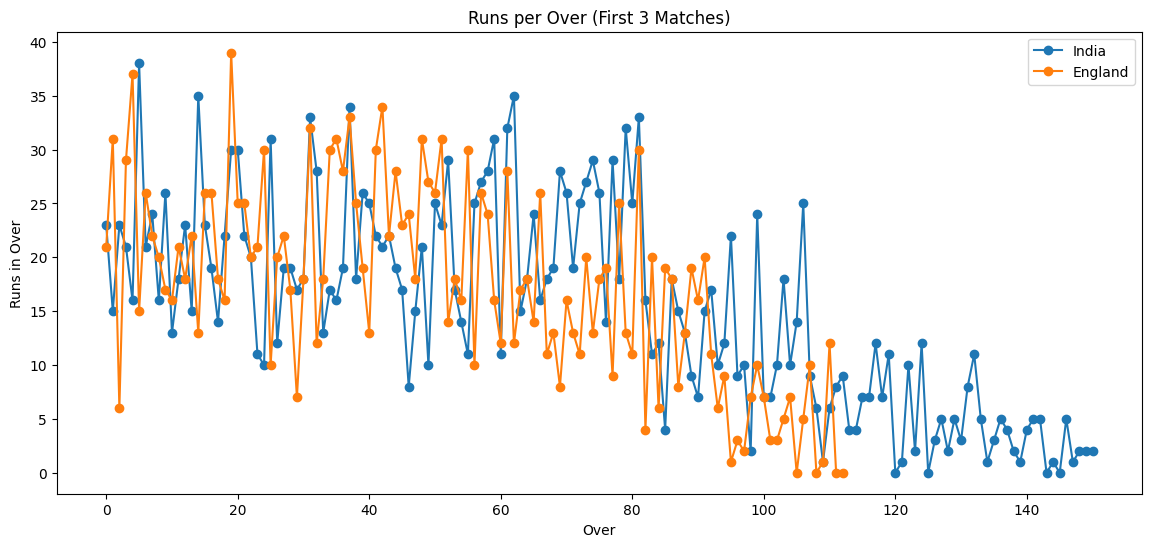

In [47]:
# RUNS PER OVER
plt.figure(figsize=(14,6))
for team in combined_df['team'].unique():
    team_df = combined_df[combined_df['team'] == team]
    over_runs = team_df.groupby('over')['runs_batter'].sum()
    plt.plot(over_runs.index, over_runs.values, marker='o', label=team)
plt.title("Runs per Over (First 3 Matches)")
plt.xlabel("Over")
plt.ylabel("Runs in Over")
plt.legend()
plt.show()

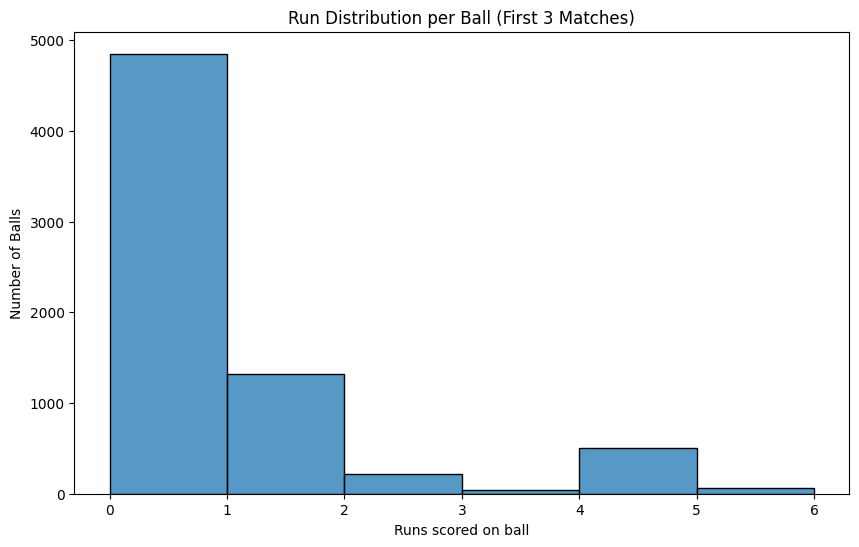

In [48]:
# RUNS DISTRIBUTION
plt.figure(figsize=(10,6))
sns.histplot(combined_df['runs_batter'], bins=range(0,7), kde=False)
plt.title("Run Distribution per Ball (First 3 Matches)")
plt.xlabel("Runs scored on ball")
plt.ylabel("Number of Balls")
plt.show()



Text(0.5, 0, 'Wickets')

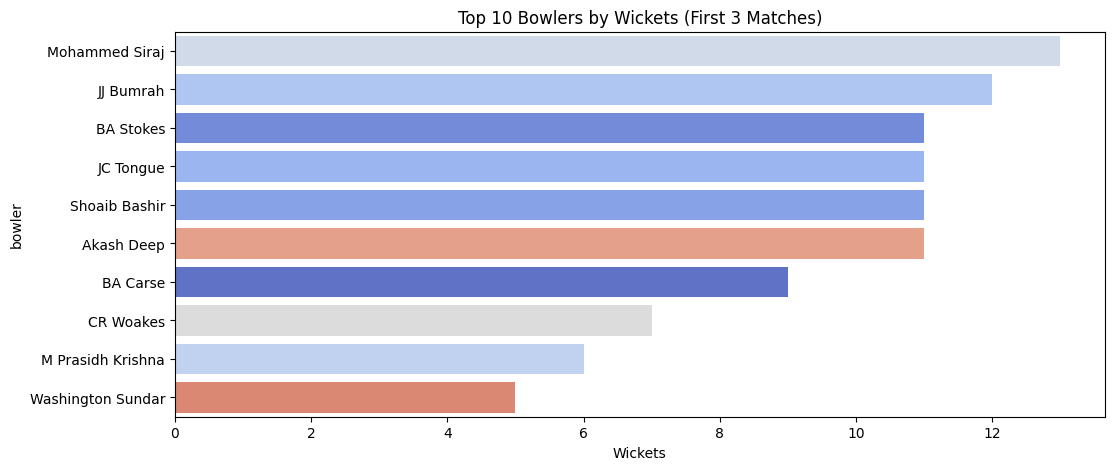

In [53]:
# WICKETS BY BOWLER
plt.figure(figsize=(12,5))
sns.countplot(
    data=wickets_df.reset_index(drop=True),
    y='bowler',
    order=wickets_df['bowler'].value_counts().index[:10],
    hue='bowler',
    palette="coolwarm",
    legend=False
)
plt.title("Top 10 Bowlers by Wickets (First 3 Matches)")
plt.xlabel("Wickets")


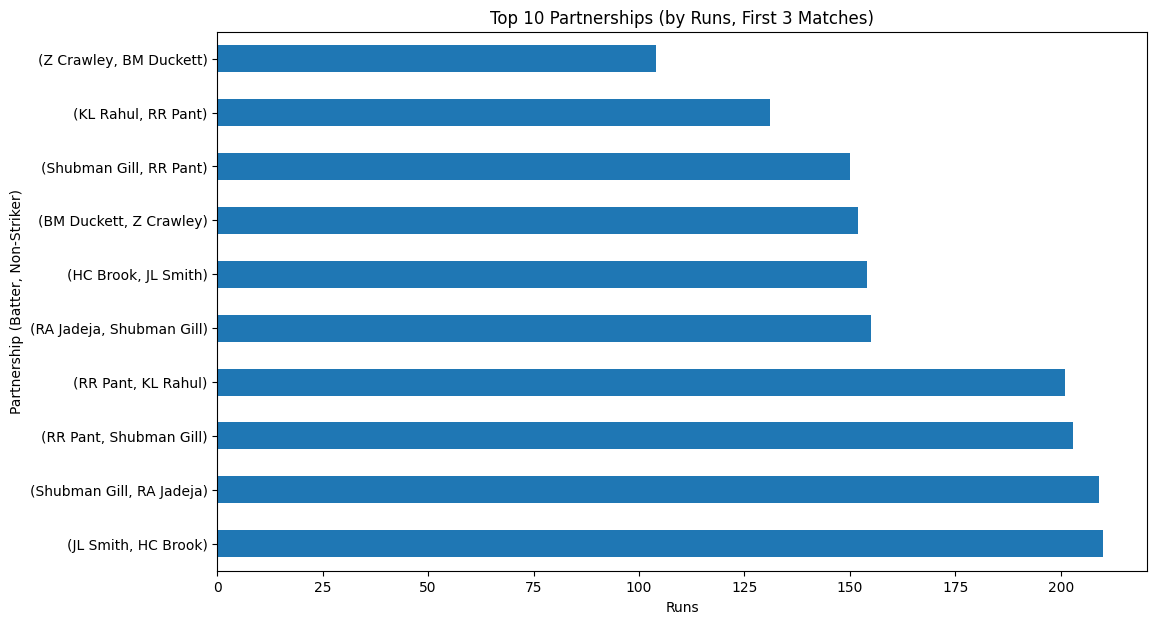

In [50]:
# PARTNERSHIP RUNS
partnerships = combined_df.groupby(['batter', 'non_striker'])['runs_batter'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,7))
partnerships.plot(kind='barh')
plt.title("Top 10 Partnerships (by Runs, First 3 Matches)")
plt.xlabel("Runs")
plt.ylabel("Partnership (Batter, Non-Striker)")
plt.show()

Extras in the series till now.

In [64]:
print(combined_df.columns)

Index(['team', 'over', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'wicket', 'player_out'],
      dtype='object')


ML Model to predict future result based on last 10 matches played on the ground.

In [51]:
# 1. Load the last 10 Manchester Test results
ground_df = pd.read_csv('/manchester_last_10_tests.csv')

# 2. Prepare features: for each match, get both teams' historical performance at Manchester *before* that match
def get_team_stats(hist_df, team):
    played = ((hist_df['Team 1'] == team) | (hist_df['Team 2'] == team)).sum()
    won = (hist_df['Winner'] == team).sum()
    drawn = (hist_df['Winner'] == 'drawn').sum()
    lost = played - won - drawn
    win_rate = won / played if played > 0 else 0
    draw_rate = drawn / played if played > 0 else 0
    return played, won, lost, win_rate, draw_rate

rows = []
# Use reset_index(drop=True) so i is always the integer row number
for i, row in ground_df.reset_index(drop=True).iterrows():
    hist = ground_df.iloc[:i]
    t1 = row['Team 1']
    t2 = row['Team 2']
    t1_stats = get_team_stats(hist, t1)
    t2_stats = get_team_stats(hist, t2)
    # Encode result: 1 = team1 win, 2 = team2 win, 0 = draw
    if row['Winner'] == t1:
        result = 1
    elif row['Winner'] == t2:
        result = 2
    else:
        result = 0
    rows.append({
        't1_played': t1_stats[0],
        't1_won': t1_stats[1],
        't1_lost': t1_stats[2],
        't1_win_rate': t1_stats[3],
        't1_draw_rate': t1_stats[4],
        't2_played': t2_stats[0],
        't2_won': t2_stats[1],
        't2_lost': t2_stats[2],
        't2_win_rate': t2_stats[3],
        't2_draw_rate': t2_stats[4],
        'result': result,
        'team1': t1,
        'team2': t2
    })

df_features = pd.DataFrame(rows)

# 3. Prepare data for ML
feature_cols = [
    't1_played', 't1_won', 't1_lost', 't1_win_rate', 't1_draw_rate',
    't2_played', 't2_won', 't2_lost', 't2_win_rate', 't2_draw_rate'
]
X = df_features[feature_cols]
y = df_features['result']

# 4. Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# 5. Predict the next match: England vs India at Manchester
eng_stats = get_team_stats(ground_df, 'England')
ind_stats = get_team_stats(ground_df, 'India')

next_match_features = pd.DataFrame([{
    't1_played': eng_stats[0],
    't1_won': eng_stats[1],
    't1_lost': eng_stats[2],
    't1_win_rate': eng_stats[3],
    't1_draw_rate': eng_stats[4],
    't2_played': ind_stats[0],
    't2_won': ind_stats[1],
    't2_lost': ind_stats[2],
    't2_win_rate': ind_stats[3],
    't2_draw_rate': ind_stats[4],
}])

pred = clf.predict(next_match_features)[0]
if pred == 1:
    prediction = 'England'
elif pred == 2:
    prediction = 'India'
else:
    prediction = 'Draw'

print(f"Predicted winner for next England vs India Test at Manchester: {prediction}")

Predicted winner for next England vs India Test at Manchester: Draw


Prediction based on last 3 matches between India vs England and last 10 test matches played **Emirates Old Trafford Manchester**

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assume df1, df2, df3: Ball-by-ball DataFrames for last 3 ENG-IND matches
# ground_df: Last 10 Manchester Test results DataFrame

def get_team_stats(hist_df, team):
    played = ((hist_df['Team 1'] == team) | (hist_df['Team 2'] == team)).sum()
    won = (hist_df['Winner'] == team).sum()
    drawn = (hist_df['Winner'] == 'drawn').sum()
    lost = played - won - drawn
    win_rate = won / played if played > 0 else 0
    draw_rate = drawn / played if played > 0 else 0
    return played, won, lost, win_rate, draw_rate

def get_h2h_stats(dlf_list, team):
    balls = pd.concat(dlf_list)
    team_batting = balls[balls['team'] == team]
    runs = team_batting['runs_batter'].sum()
    # Converted 'wicket' to numeric, treating non-convertibles as 0
    wickets = pd.to_numeric(team_batting['wicket'], errors='coerce').fillna(0).astype(int).sum()
    balls_faced = team_batting.shape[0]
    avg = runs / wickets if wickets > 0 else runs
    sr = runs / balls_faced * 100 if balls_faced > 0 else 0
    return runs, wickets, avg, sr

rows = []
for i, row in ground_df.reset_index(drop=True).iterrows():
    hist = ground_df.iloc[:i]
    t1 = row['Team 1']
    t2 = row['Team 2']
    t1_stats = get_team_stats(hist, t1)
    t2_stats = get_team_stats(hist, t2)
    if row['Winner'] == t1:
        result = 1
    elif row['Winner'] == t2:
        result = 2
    else:
        result = 0
    rows.append({
        't1_played': t1_stats[0],
        't1_won': t1_stats[1],
        't1_lost': t1_stats[2],
        't1_win_rate': t1_stats[3],
        't1_draw_rate': t1_stats[4],
        't2_played': t2_stats[0],
        't2_won': t2_stats[1],
        't2_lost': t2_stats[2],
        't2_win_rate': t2_stats[3],
        't2_draw_rate': t2_stats[4],
        't1_h2h_runs': 0,
        't1_h2h_wickets': 0,
        't1_h2h_avg': 0,
        't1_h2h_sr': 0,
        't2_h2h_runs': 0,
        't2_h2h_wickets': 0,
        't2_h2h_avg': 0,
        't2_h2h_sr': 0,
        'result': result,
        'team1': t1,
        'team2': t2,
    })

df_features = pd.DataFrame(rows)

feature_cols = [
    't1_played', 't1_won', 't1_lost', 't1_win_rate', 't1_draw_rate',
    't2_played', 't2_won', 't2_lost', 't2_win_rate', 't2_draw_rate',
    't1_h2h_runs', 't1_h2h_wickets', 't1_h2h_avg', 't1_h2h_sr',
    't2_h2h_runs', 't2_h2h_wickets', 't2_h2h_avg', 't2_h2h_sr'
]
X = df_features[feature_cols]
y = df_features['result']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

eng_stats = get_team_stats(ground_df, 'England')
ind_stats = get_team_stats(ground_df, 'India')
eng_h2h = get_h2h_stats([df1, df2, df3], 'England')
ind_h2h = get_h2h_stats([df1, df2, df3], 'India')

next_match_features = pd.DataFrame([{
    't1_played': eng_stats[0],
    't1_won': eng_stats[1],
    't1_lost': eng_stats[2],
    't1_win_rate': eng_stats[3],
    't1_draw_rate': eng_stats[4],
    't2_played': ind_stats[0],
    't2_won': ind_stats[1],
    't2_lost': ind_stats[2],
    't2_win_rate': ind_stats[3],
    't2_draw_rate': ind_stats[4],
    't1_h2h_runs': eng_h2h[0],
    't1_h2h_wickets': eng_h2h[1],
    't1_h2h_avg': eng_h2h[2],
    't1_h2h_sr': eng_h2h[3],
    't2_h2h_runs': ind_h2h[0],
    't2_h2h_wickets': ind_h2h[1],
    't2_h2h_avg': ind_h2h[2],
    't2_h2h_sr': ind_h2h[3],
}])

pred = clf.predict(next_match_features)[0]
if pred == 1:
    prediction = 'England'
elif pred == 2:
    prediction = 'India'
else:
    prediction = 'Draw'

print(f"Predicted winner for next England vs India 4th Test at Manchester: {prediction}")

Predicted winner for next England vs India 4th Test at Manchester: Draw
